<h1> CLEESE: A SHORT TUTORIAL </h1>

![cleese](tutorial/pics/silly-walk.jpg)

CLEESE ("Ministry of Silly Speech") is a sound and image manipulation tool designed to generate an infinite number of possible stimuli; be it natural-sounding expressive variations around an original speech recording, or variations on the expression of a human face.

More precisely, CLEESE is currently composed of two engines: `PhaseVocoder` and `Mediapipe`.
* `PhaseVocoder` allows one to create random fluctuations around an audio file’s original contour of pitch, loudness, timbre and speed (i.e. roughly defined, its prosody). One of its foreseen applications is the generation of very many random voice stimuli for reverse correlation experiments.
* `Mediapipe` uses [mediapipe](https://google.github.io/mediapipe/)'s Face Mesh API to introduce random or precomputed deformation in the expression of a visage on an image. This engine was designed to produce batches of deformed faces for reverse correlation experiments.

CLEESE is a free, standalone Python module, distributed under an open-source MIT Licence on the IRCAM Forumnet plateform. It was designed by Juan José Burred, Emmanuel Ponsot and Jean-Julien Aucouturier (STMS, IRCAM/CNRS/Sorbonne Université, Paris), with collaboration from Pascal Belin (Institut des Neurosciences de la Timone, Aix-Marseille Université), with funding from the European Research Council (CREAM 335536, 2014-2019, PI: JJ Aucouturier), and support for face deformation was added by Lara Kermarec (2022).

This notebook is a short tutorial on how to use CLEESE to manipulate images, and is a companion to the PDF documentation available [here](https://github.com/creamlab/cleese/raw/master/doc/CLEESE_manual_v2.0.pdf).

<h2> Installation </h2>

### Python / Jupyter Notebook

CLEESE being a Python package, you will to first have a working installation of Python (versions 2.7 or 3). In addition, to run this tutorial, you will need Jupyter Notebook as well as a number of commonly used packages for scientific computing. For new users, we highly recommend [installing Anaconda](https://www.continuum.io/downloads)>. Anaconda conveniently installs Python, the Jupyter Notebook, and other commonly used packages for scientific computing and data science.

Use the following installation steps:
* Download [Anaconda](https://www.continuum.io/downloads). 
* Install the version of Anaconda which you downloaded, following the instructions on the download page.

### CLEESE

* Install CLEESE from your shell/command line: ```pip install cleese-stim```
* Launch Jupyter notebook from your shell/command line ```jupyter notebook``` and navigate to this tutorial .ipynb file
* Try running the following cell, as a test. It should import cleese as well as a number of scientific packages included in the Anaconda distribution, and return with no error. 

In [11]:
import cleese_stim as cleese
from cleese_stim.engines import Mediapipe

import numpy as np
from PIL import Image
from IPython.display import Markdown, display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 5, 2

## Basic image manipulation with CLEESE

### Random image deformation

The most basic usage scenario of CLEESE's `Mediapipe` engine is to input a single image (here, a close-up of the Mona Lisa, `pics/monalisa.jpg`)

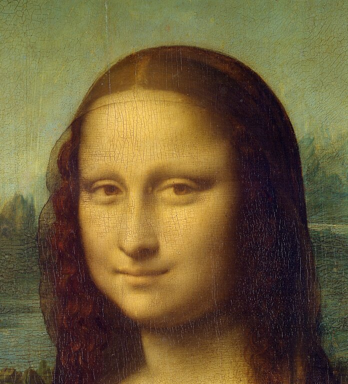

In [12]:
monalisa_file = "./pics/monalisa.jpg"
img = Image.open(monalisa_file)
width, height = img.size
display(img.resize((int(.5*width),int(.5*height))))

and use CLEESE to apply random tranformation to the expression of the face on the image. For this we use the `cleese.process_data` function that generate a single input from existing array data. We provide this function with the engine we want to use for this transformation (here: `Mediapipe`), the data itself, and a configuration file specifying the parameters of the transformation.

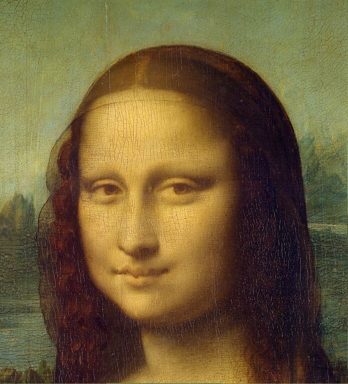

In [13]:
monalisa_file = "./pics/monalisa.jpg"
config_file = "./configs/random_lips.toml"

img = np.array(Image.open(monalisa_file))
deformed = cleese.process_data(Mediapipe, img, config_file)
def_img = Image.fromarray(deformed)
width, height = def_img.size
display(def_img.resize((int(0.5*width),int(0.5*height))))

### Direct file loading

CLEESE can also directly load image files and process them using the  `cleese.process_file` function, like so:

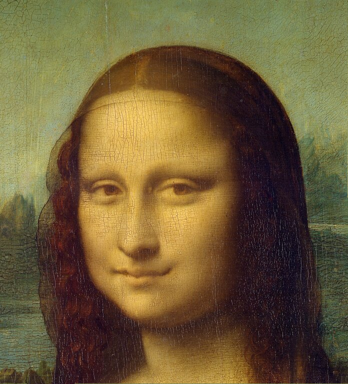

In [14]:
monalisa_file = "./pics/monalisa.jpg"
config_file = "./configs/random_lips.toml"

deformed = cleese.process_file(Mediapipe, monalisa_file, config_file)
def_img = Image.fromarray(deformed)
width, height = def_img.size
display(def_img.resize((int(.5*width),int(.5*height))))


<h3> Batched transforms </h3>

Instead of generating output files one at a time, CLEESE can be used to generate large numbers of manipulated files, each randomly generated using parameters specified in config files as above. This is achieved by using the `cleese.generate_stimuli` function. This function does not return the generated images, but directly writes them in the folder specified under `[main] outPath`, and the number of output files generated is given by `[main] numFiles`, all of which are found in the configuration file:
```
[main]

# output root folder
outPath = "tutorial/output"

# number of output files to generate (for random modifications)
numFiles = 10

# generate experiment folder with name based on current time
generateExpFolder = false
```

In [19]:
monalisa_file = "./pics/monalisa.jpg"
config_file = "./configs/random_lips.toml"

deformed = cleese.generate_stimuli(Mediapipe, monalisa_file, config_file)

Random face deformation [mediapipe]: 1/10
Random face deformation [mediapipe]: 2/10
Random face deformation [mediapipe]: 3/10
Random face deformation [mediapipe]: 4/10
Random face deformation [mediapipe]: 5/10
Random face deformation [mediapipe]: 6/10
Random face deformation [mediapipe]: 7/10
Random face deformation [mediapipe]: 8/10
Random face deformation [mediapipe]: 9/10
Random face deformation [mediapipe]: 10/10


In addition to generating 10 images containing randomly deformed faces in the ouptut directory, CLEESE also writes for each image a `.dfmxy` file containing the deformation vectors applied to each facial landmarks, as well as a file containing the positions of all the landmarks detected on the original image (`.landmarks.txt`). Additionally, both the original image and configuration files are copied to the output directory.

### Applying existing deformation

CLEESE's `Mediapipe` is also able to apply a given deformation set -- for example loaded from a `.dfmxy` file -- to an image. This can be useful to gauge the combined results of a reverse correlation experiment.

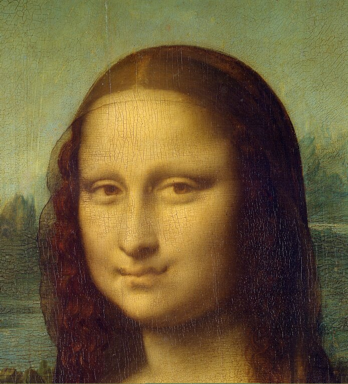

In [16]:
dfmxy_file = "./dfm/monalisa.random.dfmxy"
monalisa_file = "./pics/monalisa.jpg"
config_file = "./configs/random_lips.toml"

dfmxy = Mediapipe.load_dfmxy(dfmxy_file)
deformed = cleese.process_file(Mediapipe,
                          monalisa_file,
                          config_file,
                          dfmxy=dfmxy)

def_img = Image.fromarray(deformed)
width, height = def_img.size
display(def_img.resize((int(.5*width),int(.5*height))))

## Advanced use

### Converting `.dfmxy` to `.dfm`

Other face deformation tools developed by our team use the `.dfm` deformation file format, more suited to applying the same deformation to an arbitrary face. However, by its use of barycentric coordinates in a landmarks triangulation, it isn't suited to any post or pre-processing, which is an area where `.dfmxy` shines. As a result, CLEESE's `Mediapipe` provides a way to convert a given, `.dfmxy` to `.dfm`, provided you also have the original landmarks on hand:

In [17]:
dfmxy_file = "./dfm/monalisa.random.dfmxy"
landmarks_file = "./dfm/monalisa.landmarks.txt"
dfm_file = "./output/converted.dfm"

Mediapipe.dfmxy_to_dfm(dfmxy_file,
                       landmarks_file,
                       output_dfm_file=dfm_file)


### Applying a `.dfm`

As another compatibility feature, CLEESE's `Mediapipe` also allow for applying an existing `.dfm` file to an arbitrary image:

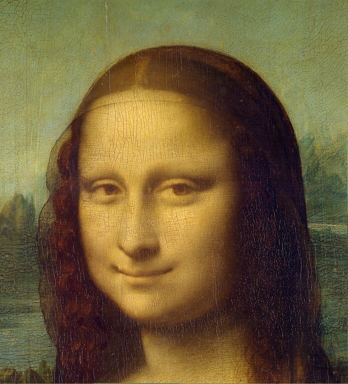

In [18]:
dfm_file = "./dfm/default.dfm"
monalisa_file = "./pics/monalisa.jpg"
config_file = "./configs/random_lips.toml"

dfm = Mediapipe.load_dfm(dfm_file)
deformed = cleese.process_file(Mediapipe,
                          monalisa_file,
                          config_file,
                          dfm=dfm)
def_img = Image.fromarray(deformed)
width, height = def_img.size
display(def_img.resize((int(.5*width),int(.5*height))))
